In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import multivariate_normal
from scipy.integrate import odeint
class ip:
    #Ip for 'inverse problem'
    # Initialize prior chain starting point,
    # chain burn-in length and total length, and 
    # Q (for proposal samples).  
    # Initialize experimental data.
    #theta = np.array([0.15,5.])
    # theta is initialized as the starting point
    # of the chain.  It is placed at the prior
    # mean.
    mcmc_length = 100000 #50000
    mcmc_burn_in = 10000 # number of samples #10000
    # trimmed off the beginning of the Markov
    # chain
    mu_prior = np.array([1.,5.]) # (0.12,0.02,0.42)
    cov_prior = np.array([[1., 0.], #0.05,0,0
                          [0., 1.]])  # 0,0.5,0
                                      # 0,0,1
    #X = np.array([1, 0])
    experiment = 2 #3
    Q_mu = np.array([0,0]) # Q samples the next step at any point #[0,0,0]
    # in the chain.  The next step may be accepted or rejected.  Q_mu
    # is centered (0) around the current theta.
    Q_cov = cov_prior/20 # Take small steps.
    
    #main function to get samples
    def MetropolisHastings(self):
        samples = np.zeros((self.mcmc_length,2)) # np.zeros((self.mcmc_length,3))
        samples[0,:] = self.mu_prior #initialize the chain
        likelihoods_vec = np.zeros((self.mcmc_length,1))
        posteriors_un_normed_vec = np.zeros((self.mcmc_length,1))
        priors_vec = np.zeros((self.mcmc_length,1))
        for i in range(1,self.mcmc_length):
            # print(i)
            proposal_sample = samples[i-1,:] + \
                np.random.multivariate_normal( \
                self.Q_mu,self.Q_cov)
            prior_proposal = self.prior(proposal_sample)
            likelihood_proposal = self.likelihood(proposal_sample)
            prior_current_location = self.prior(samples[i-1,:])
            likelihood_current_location = self.likelihood(samples[i-1,:])
            accept_pro = (likelihood_proposal*prior_proposal)/ \
                (likelihood_current_location*prior_current_location)
            uni_rand = np.random.uniform()
            if uni_rand<accept_pro:
                samples[i,:] = proposal_sample
                posteriors_un_normed_vec[i] = \
                         likelihood_proposal*prior_proposal
                likelihoods_vec[i] = likelihood_proposal
                priors_vec[i] = prior_proposal
            else:
                samples[i,:] = samples[i-1,:]
                posteriors_un_normed_vec[i] = likelihood_current_location* \
                         prior_current_location
                likelihoods_vec[i] = likelihood_current_location
                priors_vec[i] = prior_current_location
            ########################################
        samples = samples[self.mcmc_burn_in:]
        posteriors_un_normed_vec = posteriors_un_normed_vec[self.mcmc_burn_in:]
        likelihoods_vec = likelihoods_vec[self.mcmc_burn_in:]
        priors_vec = priors_vec[self.mcmc_burn_in:]
        #posterior probabilites are transformed to a standard normal (std=1)
        #for obtaining the evidence:
        evidence = np.mean(posteriors_un_normed_vec)*np.sqrt(2*np.pi*np.std(samples)**2)
        posteriors_vec = posteriors_un_normed_vec/evidence
        log_ratios = np.log(posteriors_vec/priors_vec)
        print('log ratios',log_ratios)
        log_ratios[np.isinf(log_ratios)] = 0
        log_ratios = np.nan_to_num(log_ratios)
        info_gain = np.mean(log_ratios)
        return [evidence, info_gain, samples]
    
    def prior(self,sample):
    
        probability = multivariate_normal.pdf(x=sample,
                         mean=self.mu_prior, 
                         cov=self.cov_prior)
        #print('prior: ' + str(probability))
        return probability
        
    def likelihood(self,sample):
        
        probability = multivariate_normal.pdf(x=np.matmul(sample,np.transpose(self.X)), \
               mean=self.experiment, cov=1) # Here we are putting
        #in the model and experiment
        #print('sample goose 0: ' + str(sample[0]))
        #print('experiment: ' + str(self.experiment))
        #print('likelihood: ' + str(probability))
        
        return probability



In [2]:
# Sequence 0
evidence_vec_seq_0 = []
info_gain_vec_seq_0 = []
exp_values=[0,1,2,3]
print('Sequence 0')
for val in exp_values:
    print('Experiment %d' %(val))
    ip_object = ip()
    ip_object.experiment = val
    ip_object.X = np.array([1, 0])

    [evidence, info_gain, samples_seq_0] = ip_object.MetropolisHastings()
    print('evidence: ' + str(evidence))
    print('info_gain: ' + str(info_gain))
    evidence_vec_seq_0.append(evidence)
    info_gain_vec_seq_0.append(info_gain)



Sequence 0
Experiment 0
log ratios [[0.86324367]
 [0.7942778 ]
 [0.73159626]
 ...
 [0.97456843]
 [0.97410288]
 [0.98570577]]
evidence: 0.1476226657457278
info_gain: 0.6284553384660337
Experiment 1
log ratios [[0.82403845]
 [0.78451503]
 [0.82327732]
 ...
 [0.57463445]
 [0.37383942]
 [0.27582524]]
evidence: 0.17496827022442446
info_gain: 0.5816716755017702
Experiment 2
log ratios [[1.16880942]
 [1.13675298]
 [1.10972117]
 ...
 [1.12444645]
 [1.12444645]
 [1.06828192]]
evidence: 0.12391786106232938
info_gain: 0.8029935473854352
Experiment 3
log ratios [[1.99742698]
 [1.96505381]
 [1.94471625]
 ...
 [0.56315596]
 [0.65570689]
 [0.68263985]]
evidence: 0.050331677159983254
info_gain: 1.3050800556503588


In [3]:
# Sequence 1
evidence_vec_seq_1 = []
info_gain_vec_seq_1 = []
exp_values=[0,1,2,3]
print('Sequence 1')
for val in exp_values:
    print('Experiment %d' %(val))
    ip_object = ip()
    ip_object.experiment = val
    ip_object.X = np.array([0, 1])
    [evidence, info_gain, samples_seq_1] = ip_object.MetropolisHastings()
    print('evidence: ' + str(evidence))
    print('info_gain: ' + str(info_gain))
    evidence_vec_seq_1.append(evidence)
    info_gain_vec_seq_1.append(info_gain)

Sequence 1
Experiment 0
log ratios [[5.07936496]
 [5.24876461]
 [5.11818491]
 ...
 [1.76021914]
 [2.52333419]
 [2.52333419]]
evidence: 0.00017616143642168396
info_gain: 4.362298204470152
Experiment 1
log ratios [[5.3372683 ]
 [5.24896951]
 [5.14942484]
 ...
 [3.96532866]
 [3.47410086]
 [3.44937162]]
evidence: 0.0018909190509772637
info_gain: 3.13233953393576
Experiment 2
log ratios [[2.06385434]
 [2.06385434]
 [2.28138239]
 ...
 [3.20892749]
 [3.25532184]
 [3.25532184]]
evidence: 0.012897328248065169
info_gain: 2.078371358670814
Experiment 3
log ratios [[1.03353545]
 [0.88258987]
 [0.88258987]
 ...
 [1.98455952]
 [2.01129229]
 [1.96521593]]
evidence: 0.050810923015441066
info_gain: 1.3143816137034428


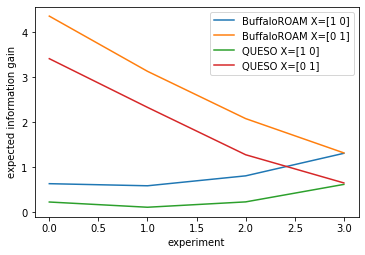

In [4]:
y_0 = np.array([0.0, 1.0, 2.0, 3.0]) 
y_1 = np.array([0.0, 1.0, 2.0, 3.0])
queso_eig_0 = np.array([0.219897,0.103361,0.222729,0.612259])
queso_eig_1 = np.array([3.4139,2.32909,1.273,0.645288])

#KL_0 = np.asarray([1.7524291433799108,0.7476250302681156,1.7597385075114331,4.817470522943548])
#KL_1 = np.asarray([26.139987188507476,17.068479558170793,9.971516512048423,4.891687048058696])

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(6,4))
p1=ax.plot(y_0, info_gain_vec_seq_0, label=r'BuffaloROAM X=[1 0]')
p2=ax.plot(y_1, info_gain_vec_seq_1,label=r'BuffaloROAM X=[0 1]')
p3=ax.plot(y_0, queso_eig_0, label=r'QUESO X=[1 0]')
p4=ax.plot(y_1, queso_eig_1, label=r'QUESO X=[0 1]')
ax.set_xlabel('experiment')
ax.set_ylabel('expected information gain')
plt.gca().legend()
ax.autoscale_view()
fig.subplots_adjust(left=0.15)
fig.subplots_adjust(bottom=0.15)

fig.savefig('eig.png',dpi=300)